In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import edge_detection_MN as ednew

# Load bolometry images

In [14]:
crop_frames = ednew.square_crop_the_file('musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
crop_frames2 = ednew.fixed_crop_the_file('musicalrobot/data/10_17_19_DDA_shallow_plate.tiff')
crop_frames3 = ednew.not_crop_the_file('musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')

In [13]:
#sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frames, 3, 3)
sorted_regprops2, s_temp2, p_temp2, inf_temp2, m_df2 = ed.inflection_temp(crop_frames2, 3, 3)
sorted_regprops3, s_temp3, p_temp3, inf_temp3, m_df3 = ed.inflection_temp(crop_frames3, 3, 4)

Not all the samples are being recognized with the set             minimum size and threshold range


D:\You Hsin Chen\UW\Direct\Capstone Project\musical-robot-ver2\musicalrobot\edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


ValueError: arrays must all be same length

In [5]:
inf_temp

[45.95,
 36.39,
 44.59,
 45.5,
 42.73,
 44.97200000000001,
 39.545999999999985,
 39.51,
 40.9]

### Part A: Original version
#### Calculate and plot std of sample temperatures at each frame

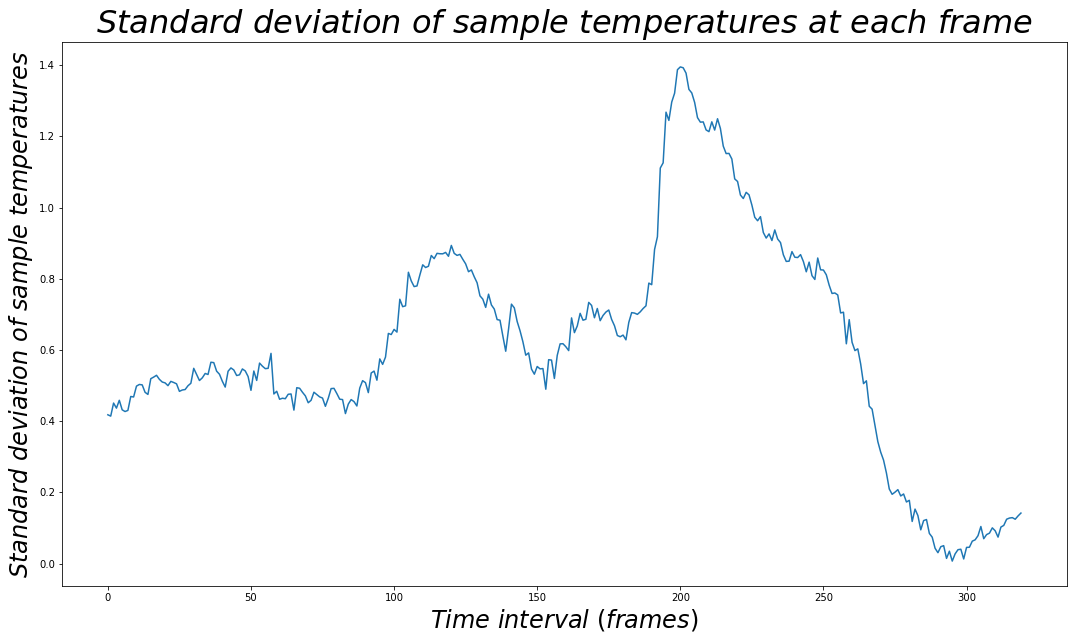

In [9]:
std = []
for i in range(len(s_temp[0])):
    total = 0
    for x in range(len(s_temp)):
        total += s_temp[x][i]
    mean = total/len(s_temp)
    for x in range(len(s_temp)):
        mean_square = np.mean(np.abs(s_temp[x][i] - mean)**2)
    std.append(np.sqrt(mean_square))
sample_temp = plt.figure(figsize=(18,10))
ax1 = sample_temp.add_subplot()
ax1.plot(range(320), std)
ax1.set_title("$Standard$ $deviation$ $of$ $sample$ $temperatures$ $at$ $each$ $frame$", fontsize=32)
ax1.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=24)
ax1.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=24)
plt.show()

#### Temperature at inflection points (melting temperature)

In [ ]:
std_melt_temp = np.std(inf_temp)
mean_melt_temp = np.mean(inf_temp)
print("standard deviation of melting temperature: " + str(std_melt_temp))
print("mean of melting temperature: " + str(mean_melt_temp))

### Part B: New version
#### Calculate and plot std of sample temperatures at each frame

#### Temperature at inflection points (melting temperature)